# Assignment.10 - Program 01

## Packages

In [356]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Tasks

In [357]:
# 1 The data file for this project is available from the Seaborn website. To load this data into a DataFrame,run this code:
data = sns.load_dataset('diamonds')

In [358]:
# 2 Display the first five rows of data.
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/tmp/ipykernel_2842/2643582326.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

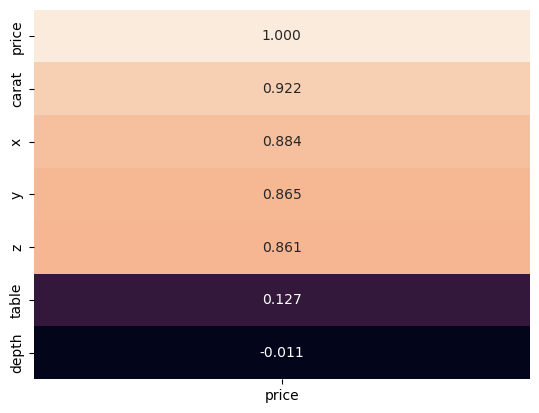

In [359]:
# 3 Use a condensed heatmap to identify correlations for the price column. 
# Sort the results, include annotations that format the values with three decimal places, and remove the color bar.
corr = data.corr()
sortcorr = corr['price'].sort_values(ascending=False).to_frame()
sns.heatmap(sortcorr, cbar=False, annot=True, fmt='.3f')

In [360]:
# 4 Use the column with the strongest correlation to split the data into test and training datasets, where the
# test dataset consists of 30% of the total dataset. Be sure to specify a value for the random_state parameter.
x = data[[sortcorr.index[1]]]
y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [361]:
# 5 Create a LinearRegression object, and then fit the training dataset to the model.
linreg = LinearRegression().fit(X_train, Y_train)

In [362]:
# 6 Score the model using the test dataset.
linreg.score(X_test, Y_test)

0.8516795797317545

In [363]:
# 7 Predict the y values based on the x values in the test dataset, and store the results in a variable.
predicted_Y = linreg.predict(X_test)

In [364]:
# 8 Put the predicted values in a DataFrame
predicted_data = pd.DataFrame({'Predicted': predicted_Y})

In [365]:
# 9 Join the y_test and predicted data with the x_test data, save the joined data in a new DataFrame, and then display the first five rows of data
prediction = pd.concat([X_test, Y_test, predicted_data], axis=1)
prediction.head()

,carat,price,Predicted
30073,0.32,720.0,NaN
24423,1.89,12674.0,NaN
32066,0.33,780.0,NaN
19077,1.22,7850.0,NaN
44176,0.57,1567.0,NaN


In [366]:
# 10 Melt the actual and predicted price columns together, assigning appropriate values to the variable andvalue names.
melted = pd.melt(prediction, id_vars=[sortcorr.index[1]], value_vars=['price', 'Predicted'], value_name='Price', var_name='Type')

/tmp/ipykernel_2842/1267579432.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=melted, x=sortcorr.index[1], y='Price', ci=False, hue='Type')


<AxesSubplot: xlabel='carat', ylabel='Price'>

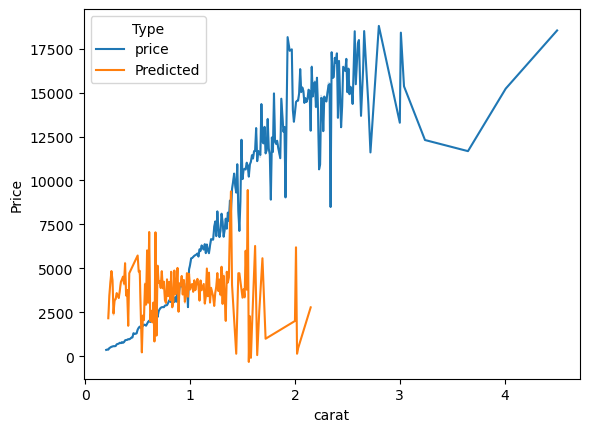

In [367]:
# 11 Use a Seaborn line plot without a confidence interval to plot the predicted data.
sns.lineplot(data=melted, x=sortcorr.index[1], y='Price', ci=False, hue='Type')
#I tried to figure this out for like an hour idk